## 0.1. Preprocessed Data Initial Exploration

This notebook provides a brief exploration of the raw dataset obtained from `youtube_trends/dataset.py` and saved in `data/raw/dataset.csv`. This initial exploration was performed to determine the techniques and tools to use during data processing for future analysis. The data processing stage can also be found in `youtube_trends/dataset.py`.

---
#### About Raw Dataset

The raw dataset contains information about trending YouTube videos, including details about the videos and their respective channels.

**Video Information**
- `video_id`: Unique identifier for the video on YouTube.
- `video_published_at`: The date and time when the video was published.
- `video_trending_date`: The date when the video was identified as trending.
- `video_trending_country`: The country where the video is trending (ISO 3166-1 alpha-2 country code, e.g., "US" for the United States).
- `video_title`: The title of the video as displayed on YouTube.
- `video_description`: The description provided by the video creator.
- `video_default_thumbnail`: URL of the default thumbnail for the video.
- `video_category_id`: Numeric ID representing the category of the video (e.g., Music, Gaming, etc.).
- `video_tags`: List of tags associated with the video for categorization and discoverability.
- `video_duration`: Duration of the video in ISO 8601 format (e.g., "PT10M15S" for 10 minutes and 15 seconds).
- `video_dimension`: Dimension of the video (e.g., "2d", "3d").
- `video_definition`: Video resolution quality (e.g., "hd" for high definition, "sd" for standard definition).
- `video_licensed_content`: Boolean indicating if the video contains licensed content.
- `video_view_count`: Total number of views for the video.
- `video_like_count`: Total number of likes for the video.
- `video_comment_count`: Total number of comments on the video.

**Channel Information**
- `channel_id`: Unique identifier for the YouTube channel.
- `channel_title`: The name/title of the channel.
- `channel_description`: Description provided by the channel owner.
- `channel_custom_url`: Custom URL for the channel (if available).
- `channel_published_at`: The date and time when the channel was created.
- `channel_country`: The country associated with the channel (if specified by the creator).
- `channel_view_count`: Total number of views across all videos on the channel.
- `channel_subscriber_count`: Total number of subscribers to the channel.
- `channel_have_hidden_subscribers`: Boolean indicating if the channel has hidden its subscriber count.
- `channel_video_count`: Total number of videos uploaded by the channel.
- `channel_localized_title`: The localized title of the channel (if available in a different language).
- `channel_localized_description`: The localized description of the channel (if available in a different language).

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from googletrans import Translator
from youtube_trends.config import RAW_DATA_DIR

2025-04-12 01:49:41.119 | INFO     | youtube_trends.config:<module>:11 - PROJ_ROOT path is: C:\Users\eddel\OneDrive\Documents\MCD\AAA\youtube_trends\venv\src\youtube-trends


In [3]:
df = pd.read_csv(RAW_DATA_DIR / "dataset.csv", low_memory=False)

In [4]:
df.head()

,video_id,video_published_at,video_trending__date,video_trending_country,channel_id,video_title,video_description,video_default_thumbnail,video_category_id,video_tags,...,channel_description,channel_custom_url,channel_published_at,channel_country,channel_view_count,channel_subscriber_count,channel_have_hidden_subscribers,channel_video_count,channel_localized_title,channel_localized_description
0,bB3-CUMERIU,2024-10-11T00:00:06Z,2024.10.12,United Arab Emirates,UCNYi_zGmR519r5gYdOKLTjQ,JENNIE - Mantra (Official Music Video),Official music video for “Mantra” by JENNIE ou...,https://i.ytimg.com/vi/bB3-CUMERIU/default.jpg,Music,"JENNIE,Mantra,제니,Jennie Mantra,Jennie from Bla...",...,NaN,@jennierubyjane,2021-01-13T06:19:55.86689Z,NaN,464615150.0,11600000.0,False,43.0,JENNIE,NaN
1,5ObJt_71AYc,2024-10-11T02:59:21Z,2024.10.12,United Arab Emirates,UCzU8-lZlRfkV3nj0RzAZdrQ,CHILE vs. BRASIL [1-2] | RESUMEN | ELIMINATORI...,#Chile #Brasil #eliminatoriassudamericanas #Cr...,https://i.ytimg.com/vi/5ObJt_71AYc/default.jpg,Sports,"fútbol,pelota,gol,copa,libertadores,sudamerica...",...,Canal Oficial de la Confederación Sudamericana...,@conmebol,2014-02-19T20:24:31Z,NaN,399046746.0,1610000.0,False,4637.0,CONMEBOL,Canal Oficial de la Confederación Sudamericana...
2,zfb0whgBBA8,2024-10-11T11:07:25Z,2024.10.12,United Arab Emirates,UCgGYPnVJytkr6sVNLQ-l0zQ,تحدي الحقيبة مع ابو عبير 🔥 | سلسلتنا #2,"1,375,547 مشترك❤️\n\nـــــــــــــــــــــــــ...",https://i.ytimg.com/vi/zfb0whgBBA8/default.jpg,Gaming,"تشكيله,فيفا,فيفا20,التمت,درافت,زلاتان,ام,جي,مل...",...,صانع محتوى وانزل مقاطع بشكل غير منظم 🌚,@mrlle99,2012-08-01T16:24:26Z,Saudi Arabia,114331110.0,1380000.0,False,314.0,LLE عبدالاله,صانع محتوى وانزل مقاطع بشكل غير منظم 🌚
3,SJfoPdeOPCQ,2024-10-11T00:10:10Z,2024.10.12,United Arab Emirates,UCzU8-lZlRfkV3nj0RzAZdrQ,VENEZUELA vs. ARGENTINA [1-1] | RESUMEN | ELIM...,#Venezuela #Argentina #eliminatoriassudamerica...,https://i.ytimg.com/vi/SJfoPdeOPCQ/default.jpg,Sports,"fútbol,pelota,gol,copa,libertadores,sudamerica...",...,Canal Oficial de la Confederación Sudamericana...,@conmebol,2014-02-19T20:24:31Z,NaN,399046746.0,1610000.0,False,4637.0,CONMEBOL,Canal Oficial de la Confederación Sudamericana...
4,UVb6QOKy0bI,2024-10-09T12:30:27Z,2024.10.12,United Arab Emirates,UCOzubmwpVZI7gD0Jf7Bk3Aw,Bougainvillea Trailer | October 17 | Jyothirma...,Presenting The Official Trailer of Bougainvill...,https://i.ytimg.com/vi/UVb6QOKy0bI/default.jpg,Film & Animation,NaN,...,Official YouTube Channel Of Amal Neerad Produc...,@amalneeradproductions5264,2017-05-31T14:31:01Z,NaN,19991522.0,40600.0,False,56.0,Amal Neerad Productions,Official YouTube Channel Of Amal Neerad Produc...


In [5]:
print(f"Shape of the dataset: {df.shape}\n")

Shape of the dataset: (2540900, 28)



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540900 entries, 0 to 2540899
Data columns (total 28 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   video_id                         object 
 1   video_published_at               object 
 2   video_trending__date             object 
 3   video_trending_country           object 
 4   channel_id                       object 
 5   video_title                      object 
 6   video_description                object 
 7   video_default_thumbnail          object 
 8   video_category_id                object 
 9   video_tags                       object 
 10  video_duration                   object 
 11  video_dimension                  object 
 12  video_definition                 object 
 13  video_licensed_content           object 
 14  video_view_count                 float64
 15  video_like_count                 float64
 16  video_comment_count              float64
 17  channel_

#### Object columns

In [7]:
# Check for missing values
missing_values = df.select_dtypes(include=['object']).isnull().sum()
missing_percentage = 100 * missing_values / len(df)
missing_df = pd.DataFrame({
    'Column': df.select_dtypes(include=['object']).columns,
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})
missing_df = missing_df.reset_index(drop=True)
missing_df

,Column,Missing Values,Missing Percentage
0,video_id,5,0.000197
1,video_published_at,0,0.000000
2,video_trending__date,0,0.000000
3,video_trending_country,0,0.000000
4,channel_id,0,0.000000
5,video_title,0,0.000000
6,video_description,413247,16.263804
7,video_default_thumbnail,0,0.000000
8,video_category_id,1829,0.071982
9,video_tags,836588,32.924869


In [18]:
translator = Translator()

def language_detection(text):
    try:
        detect = translator.detect(text)
        return detect.lang
    except Exception as e:
        return f"Error: {e}"

df['title_language'] = df['video_title'].apply(language_detection)

KeyboardInterrupt: 

In [21]:
from langdetect import detect, DetectorFactory, LangDetectException
DetectorFactory.seed = 0

def detect_language(text):
    try:
        if pd.notnull(text) and len(text.strip()) > 10:
            return detect(text)
        else:
            return None
    except LangDetectException:
        return None

df['title_language'] = df['video_title'].apply(detect_language)

In [22]:
# Check for unique values in each object column
unique_values = df.select_dtypes(include=['object']).nunique()
unique_values_df = unique_values.reset_index()
unique_values_df.columns = ['Column', 'Unique Values']
unique_values_df

,Column,Unique Values
0,video_id,77268
1,video_published_at,74346
2,video_trending__date,177
3,video_trending_country,110
4,channel_id,20544
5,video_title,78919
6,video_description,61587
7,video_default_thumbnail,77278
8,video_category_id,16
9,video_tags,40306


The columns `video_dimension` and `channel_have_hidden_subscribers` have all non-null values equal to each other, so those columns are not gonna be consider for future analysis.

In [23]:
def pie_unique(df, column):
    values = df[column].dropna()
    counts = values.value_counts()
    fig, ax = plt.subplots()
    ax.pie(
        counts.values,
        labels = counts.index,
        autopct = '%1.2f%%',
        shadow = True,
        startangle=90
    )
    ax.set_title(f"Distribución de '{column}'")
    plt.axis('equal')
    plt.show()

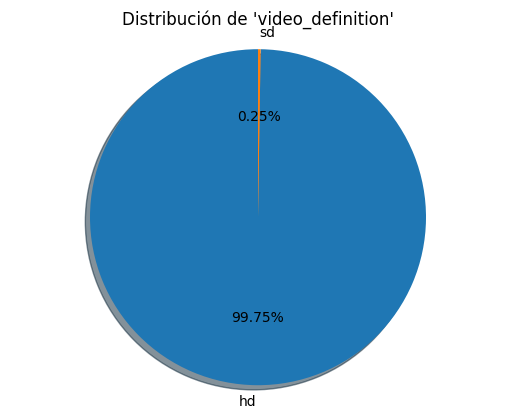

In [24]:
pie_unique(df, "video_definition")

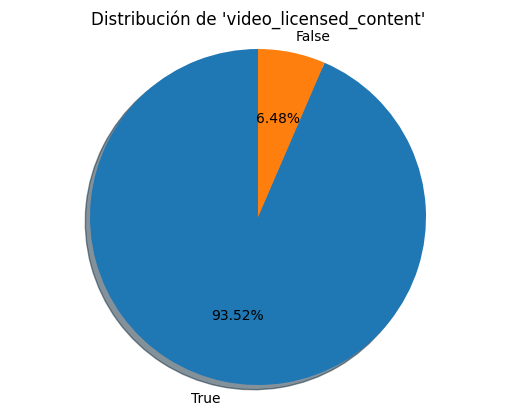

In [25]:
pie_unique(df, "video_licensed_content")

Columns `video_definition` and `video_licensed_content` are highly unbalance, however, since the amount of data per class still relatively large, we are going to keep them.

#### Float columns

In [26]:
# Check for missing values
missing_values = df.select_dtypes(include=['float64']).isnull().sum()
missing_percentage = 100 * missing_values / len(df)
missing_df = pd.DataFrame({
    'Column': df.select_dtypes(include=['float64']).columns,
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})
missing_df = missing_df.reset_index(drop=True)
missing_df

,Column,Missing Values,Missing Percentage
0,video_view_count,645,0.025385
1,video_like_count,29538,1.162501
2,video_comment_count,16822,0.662049
3,channel_view_count,10,0.000394
4,channel_subscriber_count,10,0.000394
5,channel_video_count,10,0.000394


In [27]:
df.describe()

,video_view_count,video_like_count,video_comment_count,channel_view_count,channel_subscriber_count,channel_video_count
count,2.540255e+06,2.511362e+06,2.524078e+06,2.540890e+06,2.540890e+06,2.540890e+06
mean,1.425495e+07,4.270149e+05,7.687259e+03,5.259346e+09,1.322716e+07,5.676825e+03
std,3.000706e+07,9.261549e+05,2.513576e+04,1.210481e+10,3.898922e+07,2.474092e+04
min,1.051200e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.043150e+05,2.153900e+04,5.800000e+02,2.584930e+08,8.250000e+05,2.430000e+02
50%,2.390712e+06,7.904850e+04,1.728000e+03,1.155866e+09,3.260000e+06,7.500000e+02
75%,1.260617e+07,3.709455e+05,4.775000e+03,4.742892e+09,1.130000e+07,1.853000e+03
max,4.075230e+08,1.090424e+07,6.009910e+05,2.912748e+11,3.820000e+08,6.204610e+05


In [28]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,video_view_count,video_like_count,video_comment_count,channel_view_count,channel_subscriber_count,channel_video_count
video_view_count,1.000000,0.895307,0.250902,0.443099,0.484955,-0.053607
video_like_count,0.895307,1.000000,0.344521,0.497568,0.600819,-0.059209
video_comment_count,0.250902,0.344521,1.000000,0.174241,0.181241,-0.002570
channel_view_count,0.443099,0.497568,0.174241,1.000000,0.782058,0.080798
channel_subscriber_count,0.484955,0.600819,0.181241,0.782058,1.000000,-0.008159
channel_video_count,-0.053607,-0.059209,-0.002570,0.080798,-0.008159,1.000000


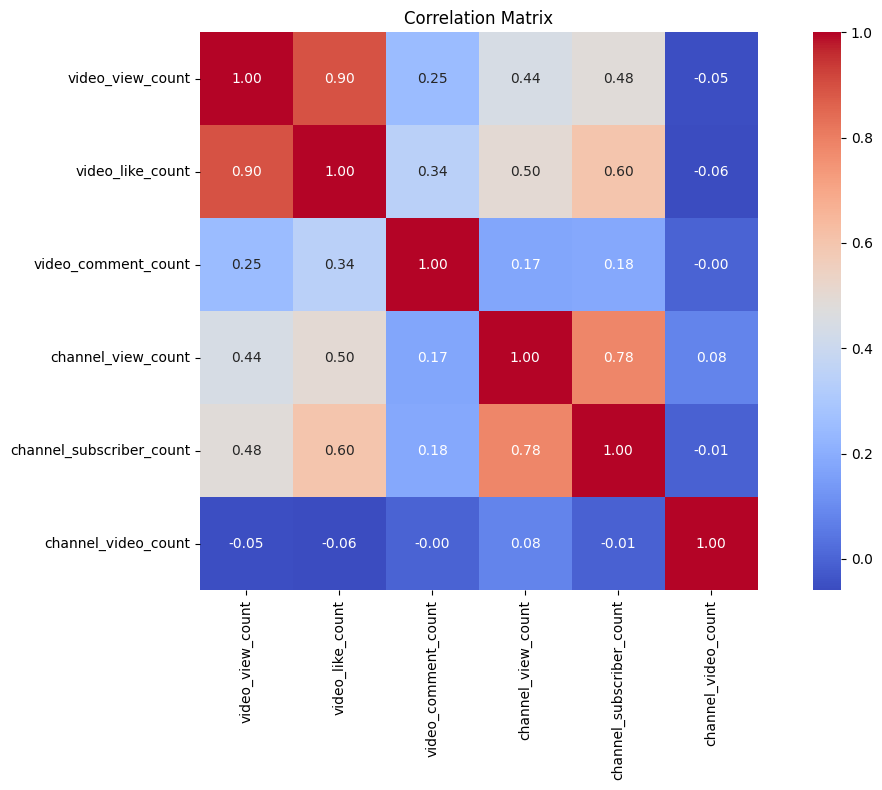

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()